#**Import Libraries**

In [18]:
import pandas as pd
import json
from collections import Counter
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

#**Load Dataset**

In [5]:
from google.colab import drive

In [6]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [7]:
df_tweet = pd.read_csv("/content/drive/MyDrive/tweet.csv")

#**Data Checking**

In [8]:
# Print the head of the dataframe
df_tweet.head()

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...


In [9]:
# Drop the 'Unnamed: 0' column from the dataframe
df_tweet = df_tweet.drop(columns=['Unnamed: 0'])

In [10]:
# Print the head of the updated dataframe
df_tweet.head()

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...


#**Check Missing values**

In [11]:
# Check for missing values in each column of the dataframe
df_tweet.isnull().sum()

,0
sentimen,0
tweet,0


#**Duplicate Data Analysis**

In [22]:
# Print the number of rows before removing duplicate entries
print('Number of rows before duplicates data dropped: ', len(df_tweet))

# Print the number of rows after removing duplicate entries
print('Number of rows after duplicates data dropped: ', len(df_tweet.drop_duplicates()))

# Calculate and print the number of duplicate rows in the dataset
print('Number of duplicated rows: ', len(df_tweet) - len(df_tweet.drop_duplicates()))


Number of rows before duplicates data dropped:  1815
Number of rows after duplicates data dropped:  1815
Number of duplicated rows:  0


#**Sentiment Label Frequency**

In [13]:
# Count the occurrences of each sentiment label
df_tweet[['sentimen']].value_counts()

,count
sentimen,
positif,612
netral,607
negatif,596


In [12]:
# Get the proportion of each sentiment label
df_tweet['sentimen'].value_counts(normalize=True) * 100

,proportion
sentimen,
positif,33.719008
netral,33.443526
negatif,32.837466


In [15]:
# Define the sentiment colors
colors = ['green', 'yellow', 'red']

# Map sentiment labels for the bar plot
sentiment_labels = df_tweet['sentimen'].replace({'positif': 'positive', 'netral': 'neutral', 'negatif': 'negative'})

# Count the occurrences of each sentiment
sentiment_counts = sentiment_labels.value_counts()

In [16]:
# Calculate the total number of sentiment occurrences
total = sentiment_counts.sum()

# Calculate the percentage of each sentiment
percentages = (sentiment_counts / total) * 100

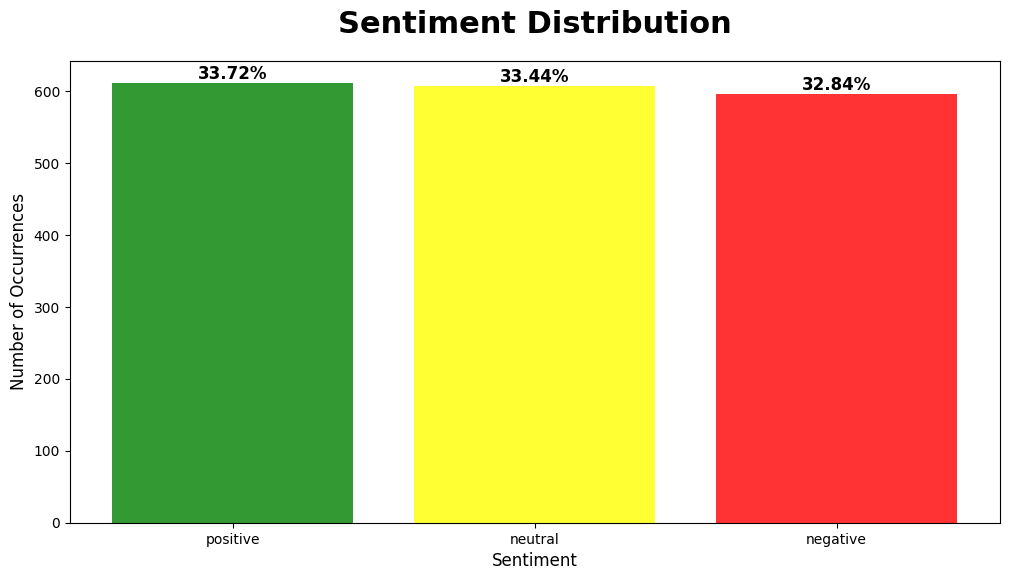

In [20]:
# Create a bar plot
plt.figure(figsize=(12,6))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, alpha=0.8, color=colors)

# Add percentage labels above each bar
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f'{percentage:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Set the font parameters for the title
font = {'weight' : 'bold',
        'size'   : 22}

# Add title and labels
plt.title('Sentiment Distribution', fontdict=font, pad=20)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.show()


#**Word Cloud Visualization for Sentiment Analysis**

In [23]:
# Create a single string of all tweets labeled as 'positif' in the DataFrame.
# ' '.join() is used to concatenate all the 'positif' tweets into one long string, with each tweet separated by a space.
positive_words = ' '.join(text for text in df_tweet[df_tweet['sentimen'] == 'positif']['tweet'])

# Create a single string of all tweets labeled as 'negatif' in the same way as the 'positif' tweets were concatenated.
negative_words = ' '.join(text for text in df_tweet[df_tweet['sentimen'] == 'negatif']['tweet'])

# Create a single string of all tweets labeled as 'netral' in the same way as the 'positif' and 'negatif' tweets were concatenated.
neutral_words = ' '.join(text for text in df_tweet[df_tweet['sentimen'] == 'netral']['tweet'])

In [24]:
# Generate a word cloud image
wordcloud_pos = WordCloud(background_color="white", width=1000, height=500).generate(positive_words) #For positive words
wordcloud_neg = WordCloud(background_color="white", width=1000, height=500).generate(negative_words) #For negative words
wordcloud_net = WordCloud(background_color="white", width=1000, height=500).generate(neutral_words) #For neutral words

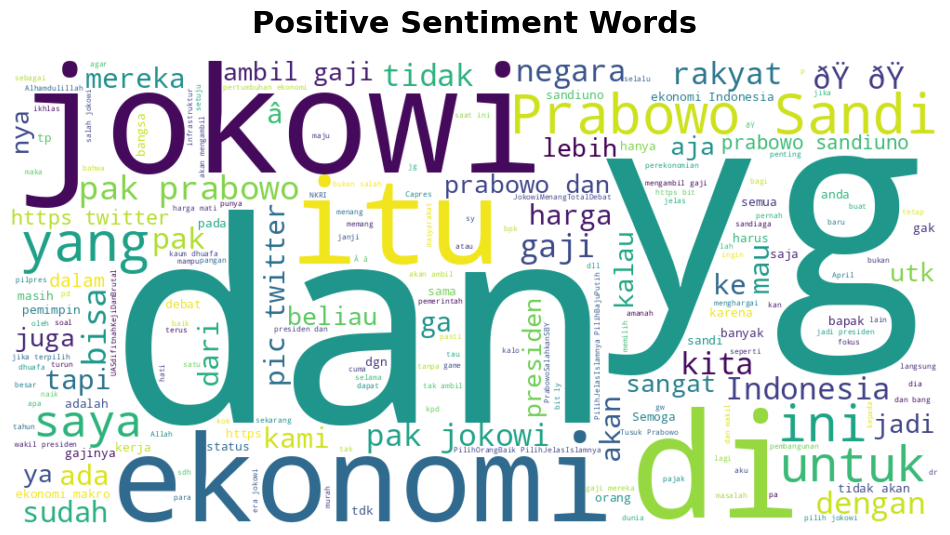

In [25]:
# Display the generated image for positive words:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Sentiment Words', fontdict=font, pad=20)
plt.show()

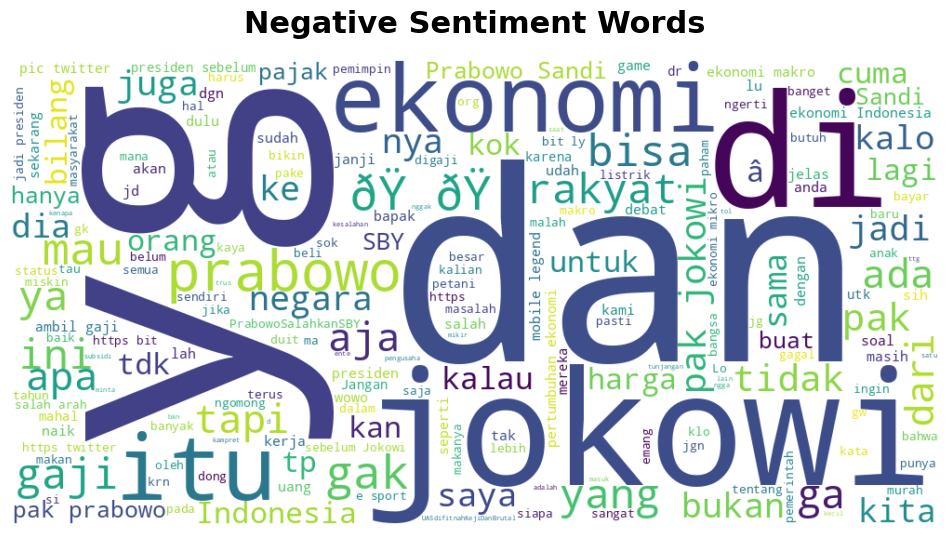

In [26]:
# Display the generated image for negative words:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Sentiment Words', fontdict=font, pad=20)
plt.show()

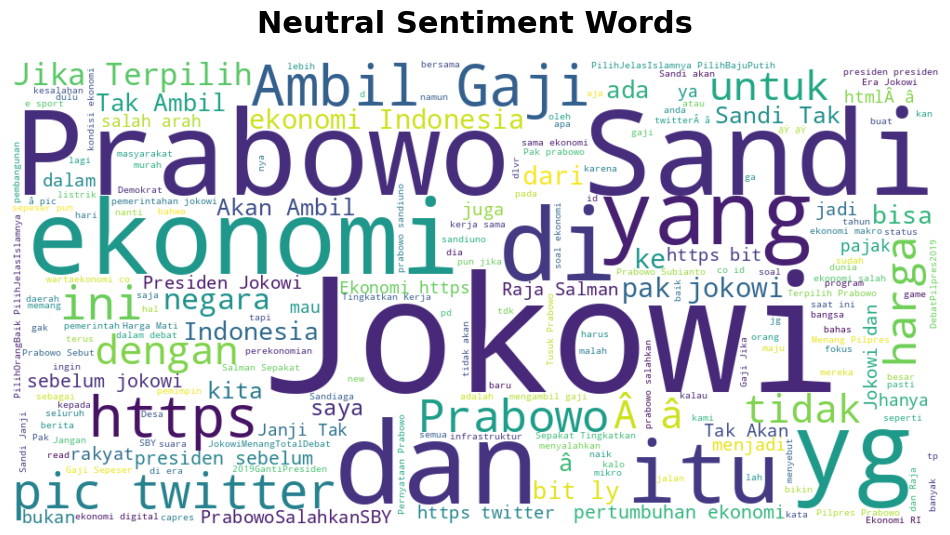

In [27]:
# Display the generated image for neutral words:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud_net, interpolation='bilinear')
plt.axis("off")
plt.title('Neutral Sentiment Words', fontdict=font, pad=20)
plt.show()

In [ ]:
# Add a new column 'tweet_length' to the DataFrame
df_tweet['tweet_length'] = df_tweet['tweet'].apply(len)

#**Tweet Length Variation Based on Sentiment**

In [28]:
# Add a new column 'tweet_length' to count the number of characters in each tweet
df_tweet['tweet_length'] = df_tweet['tweet'].apply(len)

# Display the first few rows to verify
print(df_tweet[['tweet', 'tweet_length']].head())


                                               tweet  tweet_length
0  Kata @prabowo Indonesia tidak dihargai bangsa ...           195
1  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...            93
2  Di era Jokowi, ekonomi Indonesia semakin baik....           126
3  Bagi Sumatera Selatan, Asian Games berdampak p...           128
4  Negara kita ngutang buat bngun infrastruktur y...           244


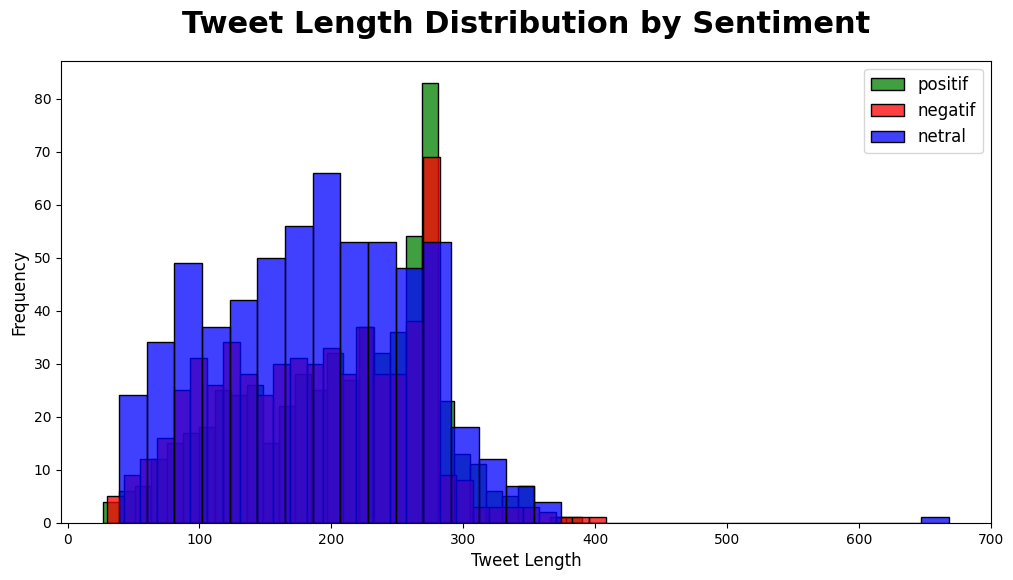

In [44]:
# Define colors for each sentiment
sentiment_colors = {
    'positif': 'green',
    'negatif': 'red',
    'netral': 'blue'
}

# Create histograms of tweet lengths for each sentiment
plt.figure(figsize=(12,6))
for sentiment in ['positif', 'negatif', 'netral']:
    subset = df_tweet[df_tweet['sentimen'] == sentiment]
    sns.histplot(subset['tweet_length'], kde=False, bins=30, label=sentiment,
                 color=sentiment_colors[sentiment])

# Add title and labels
plt.title('Tweet Length Distribution by Sentiment', fontdict=font, pad=20)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Tweet Length', fontsize=12)
plt.legend(prop={'size': 12})
plt.show()


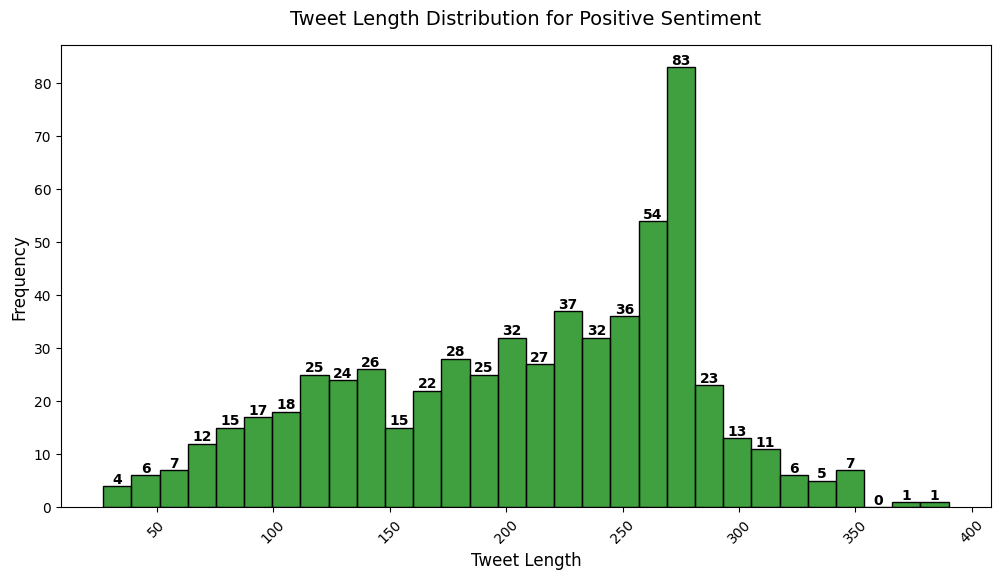

In [39]:
# Filter only tweets with positive sentiment
sentiment = 'positif'
subset = df_tweet[df_tweet['sentimen'] == sentiment]

# Create a histogram
plt.figure(figsize=(12,6))
ax = sns.histplot(subset['tweet_length'], bins=30, kde=False, color='green')

# Add frequency numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Add title and labels
plt.title(f'Tweet Length Distribution for Positive Sentiment', fontsize=14, pad=15)
plt.xlabel('Tweet Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()


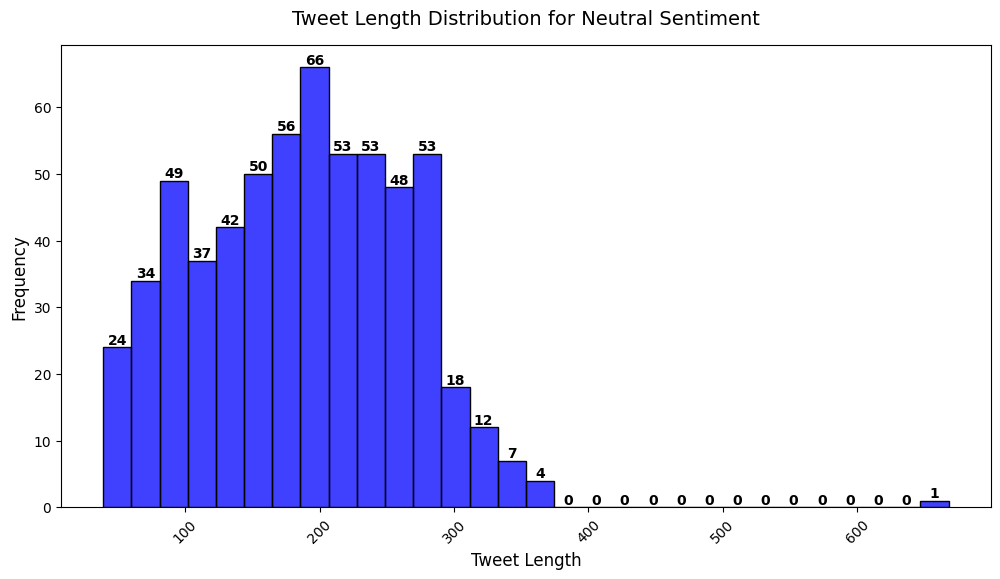

In [40]:
# Filter only tweets with neutral sentiment
sentiment = 'netral'
subset = df_tweet[df_tweet['sentimen'] == sentiment]

# Create a histogram
plt.figure(figsize=(12,6))
ax = sns.histplot(subset['tweet_length'], bins=30, kde=False, color='blue')

# Add frequency numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Add title and labels
plt.title(f'Tweet Length Distribution for Neutral Sentiment', fontsize=14, pad=15)
plt.xlabel('Tweet Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()


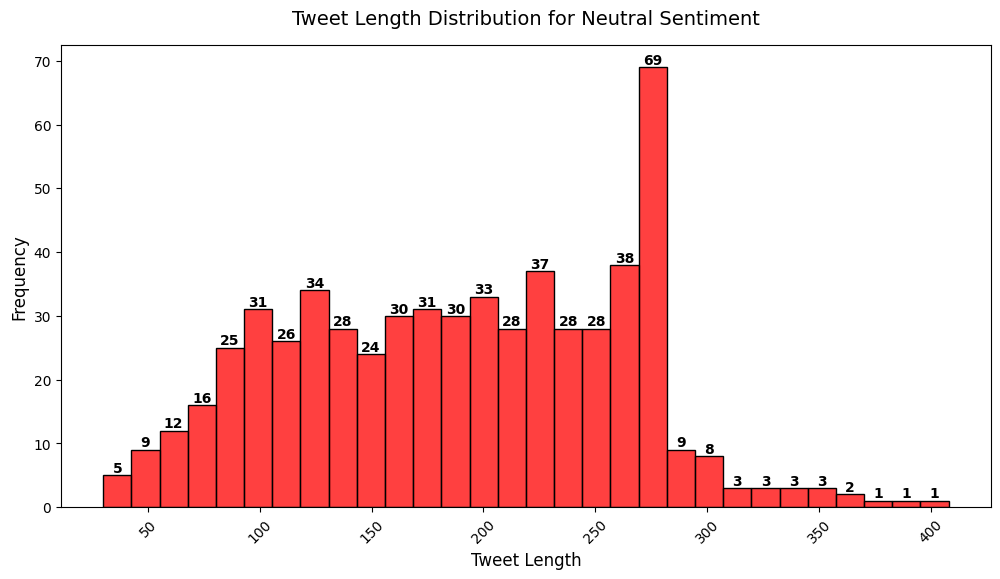

In [41]:
# Filter only tweets with negative sentiment
sentiment = 'negatif'
subset = df_tweet[df_tweet['sentimen'] == sentiment]

# Create a histogram
plt.figure(figsize=(12,6))
ax = sns.histplot(subset['tweet_length'], bins=30, kde=False, color='red')

# Add frequency numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Add title and labels
plt.title(f'Tweet Length Distribution for Neutral Sentiment', fontsize=14, pad=15)
plt.xlabel('Tweet Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()


#**Most Common Words by Sentiment**

In [46]:
# Function to get the most common words
def most_common_words(subset, num_words=10):
    all_words = ' '.join(subset).split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(num_words)
    return pd.DataFrame(common_words, columns=['Word', 'Frequency'])


In [48]:
# Define color dictionary
color_dict = {'positif': 'green', 'negatif': 'blue', 'netral': 'red'}

# Define mapping dictionary
name_dict = {'positif': 'Positive', 'negatif': 'Negative', 'netral': 'Neutral'}

Most Common Words in Positive Tweets:


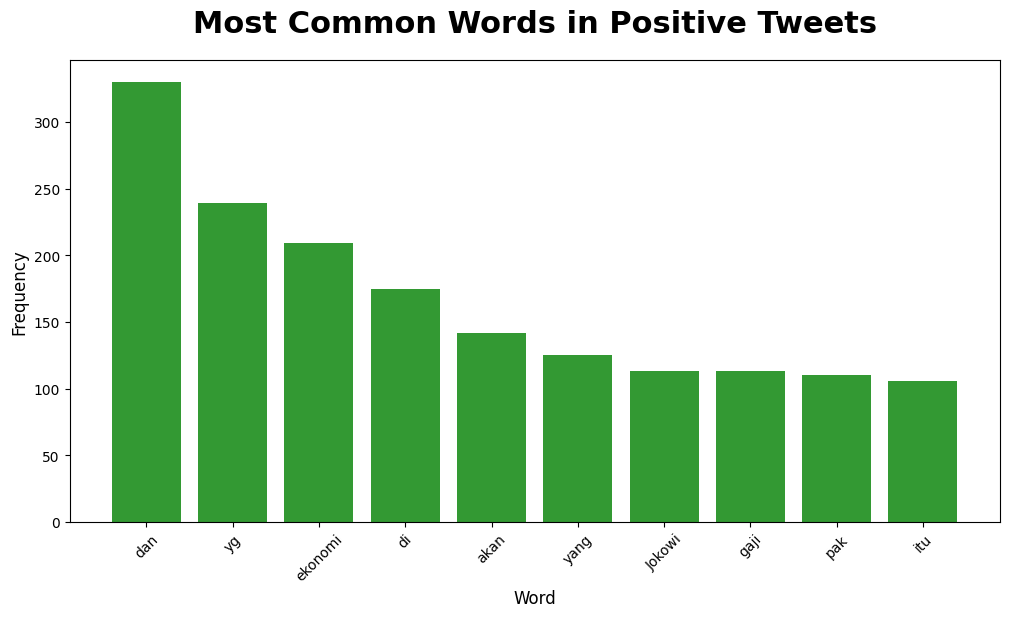

Most Common Words in Negative Tweets:


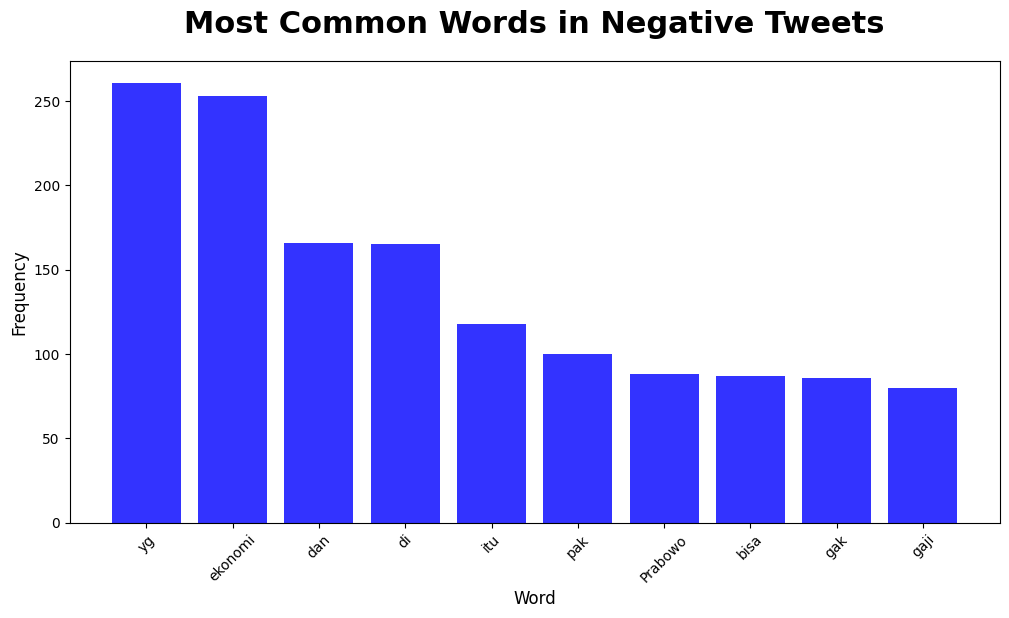

Most Common Words in Neutral Tweets:


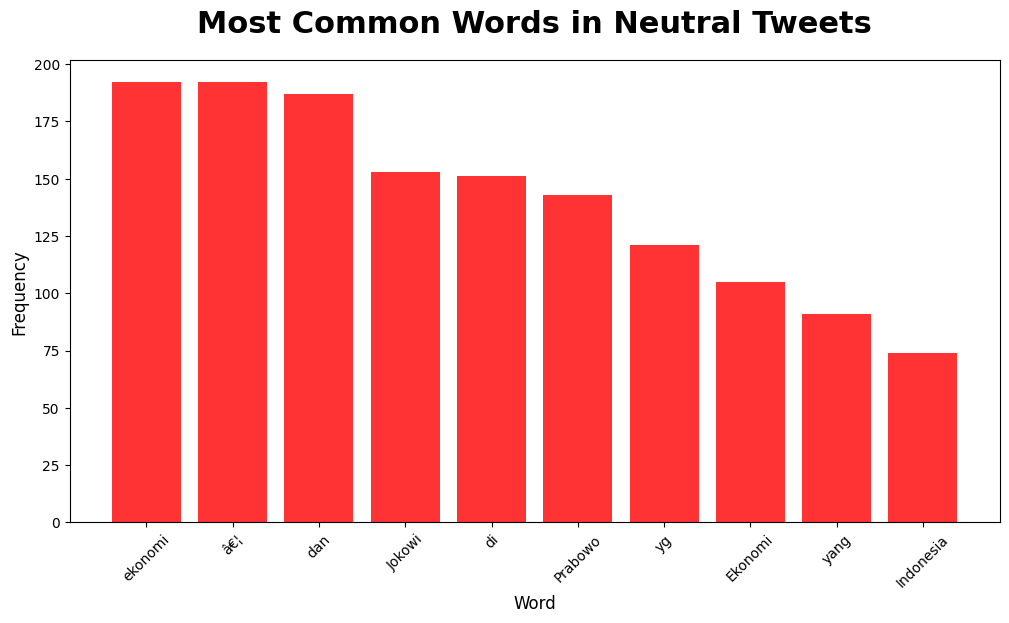

In [49]:
# Find and display most common words for each sentiment
for sentiment in ['positif', 'negatif', 'netral']:
    print(f'Most Common Words in {name_dict[sentiment]} Tweets:')
    subset = df_tweet[df_tweet['sentimen'] == sentiment]['tweet']
    common_words_df = most_common_words(subset)

    # Create a bar plot
    plt.figure(figsize=(12,6))
    plt.bar(common_words_df['Word'], common_words_df['Frequency'], alpha=0.8, color=color_dict[sentiment])
    plt.title(f'Most Common Words in {name_dict[sentiment]} Tweets', fontdict=font, pad=20)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel('Word', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

In [51]:
# Function to count the number of unique words
def count_unique_words(subset):
    all_words = ' '.join(subset).split()
    return len(set(all_words))

In [52]:
# Count and store the number of unique words for each sentiment
sentiments = ['positif', 'negatif', 'netral']
unique_word_counts = [count_unique_words(df_tweet[df_tweet['sentimen'] == sentiment]['tweet']) for sentiment in sentiments]

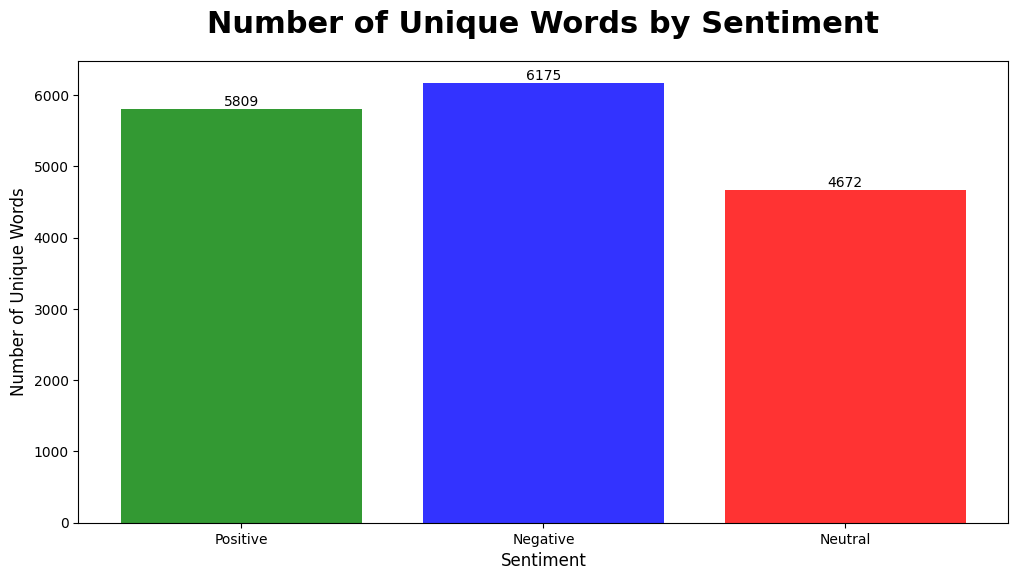

In [53]:
# Create a bar plot
plt.figure(figsize=(12,6))
bars = plt.bar([name_dict[sentiment] for sentiment in sentiments], unique_word_counts, alpha=0.8, color=[color_dict[sentiment] for sentiment in sentiments])
plt.title('Number of Unique Words by Sentiment', fontdict=font, pad=20)
plt.ylabel('Number of Unique Words', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()

#**Most Common Hastags and Mentions by Sentiment**

In [56]:
# Define a function to find most common hashtags or mentions
def most_common_hashtags_or_mentions(texts, symbol, n=10):
    all_words = ' '.join(texts).split()
    words = [word for word in all_words if word.startswith(symbol)]
    common_words = Counter(words).most_common(n)
    return pd.DataFrame(common_words, columns=[symbol, 'Frequency'])

In [57]:
# Define color mapping for each sentiment
color_dict = {
    'positif': 'green',   # Green for positive sentiment
    'netral': 'blue',     # Blue for neutral sentiment
    'negatif': 'red'      # Red for negative sentiment
}

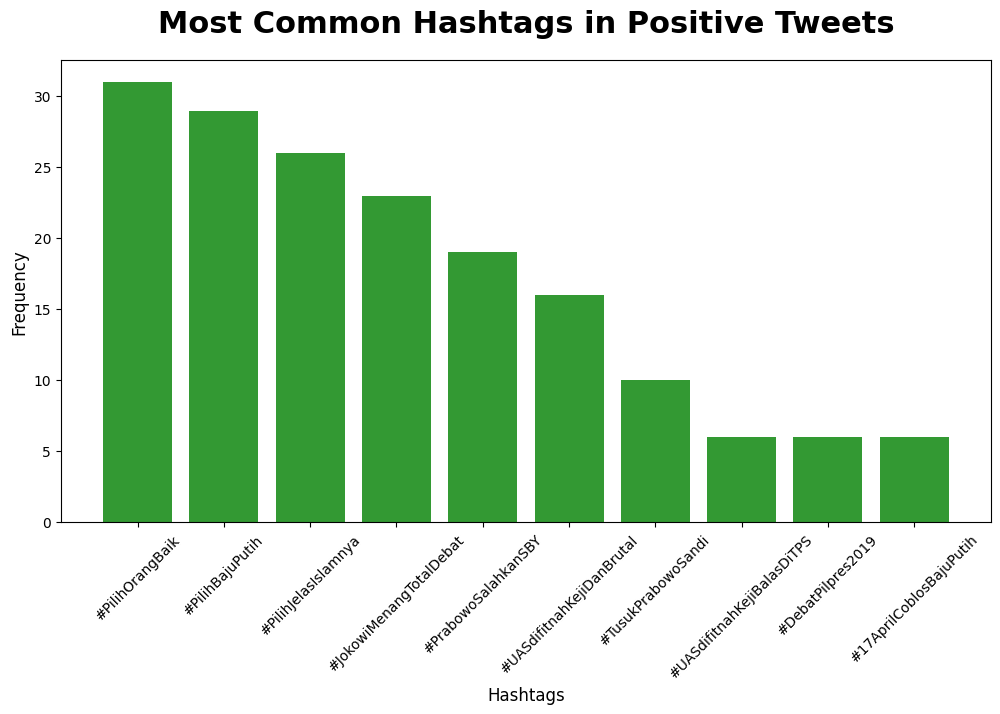

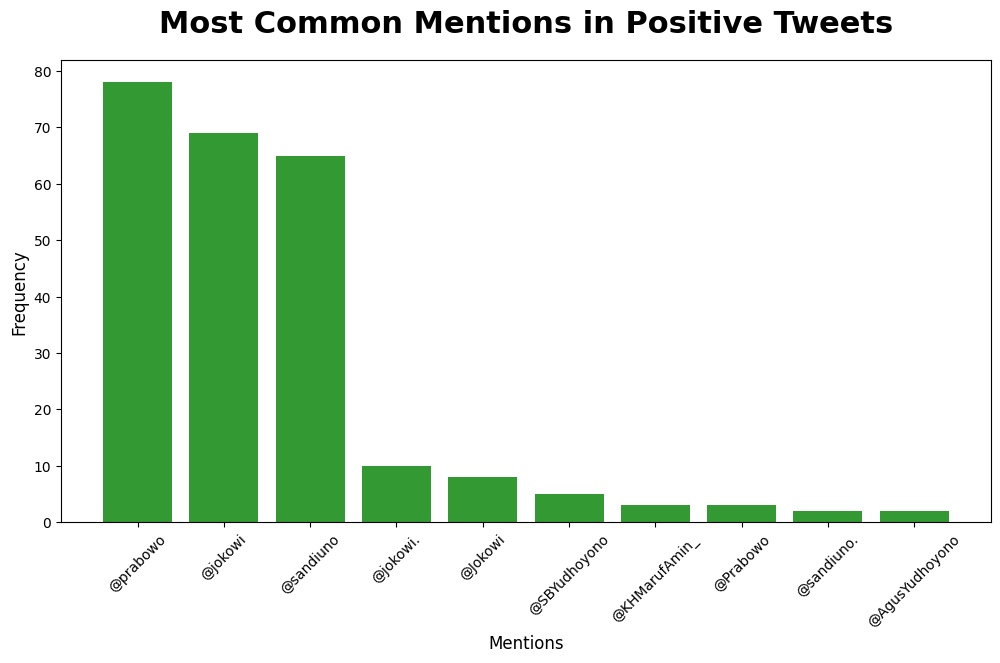

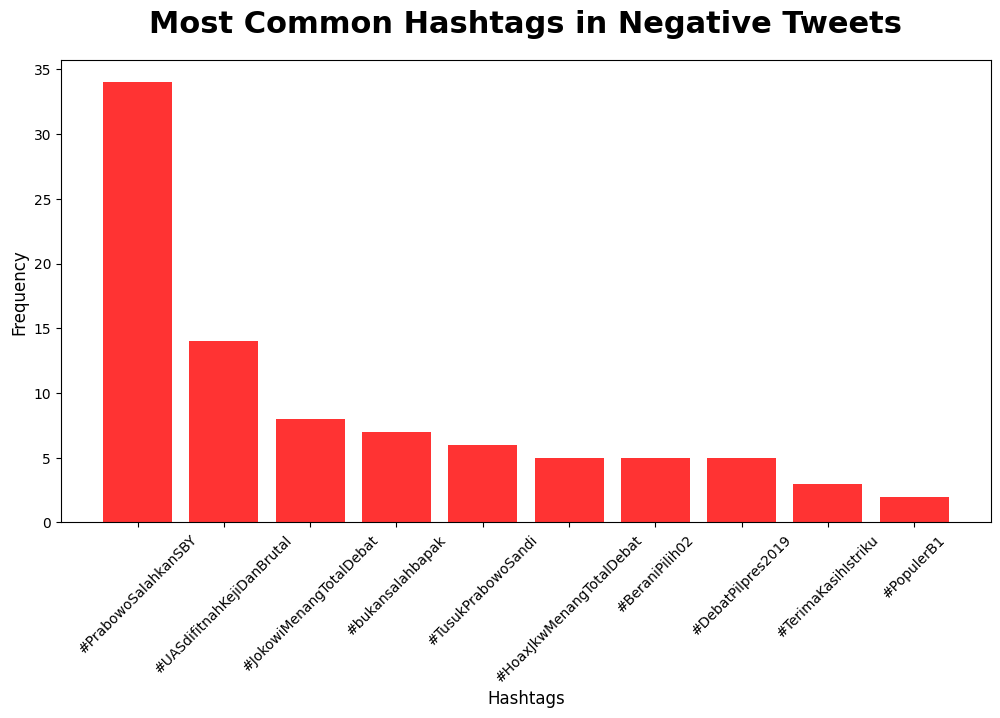

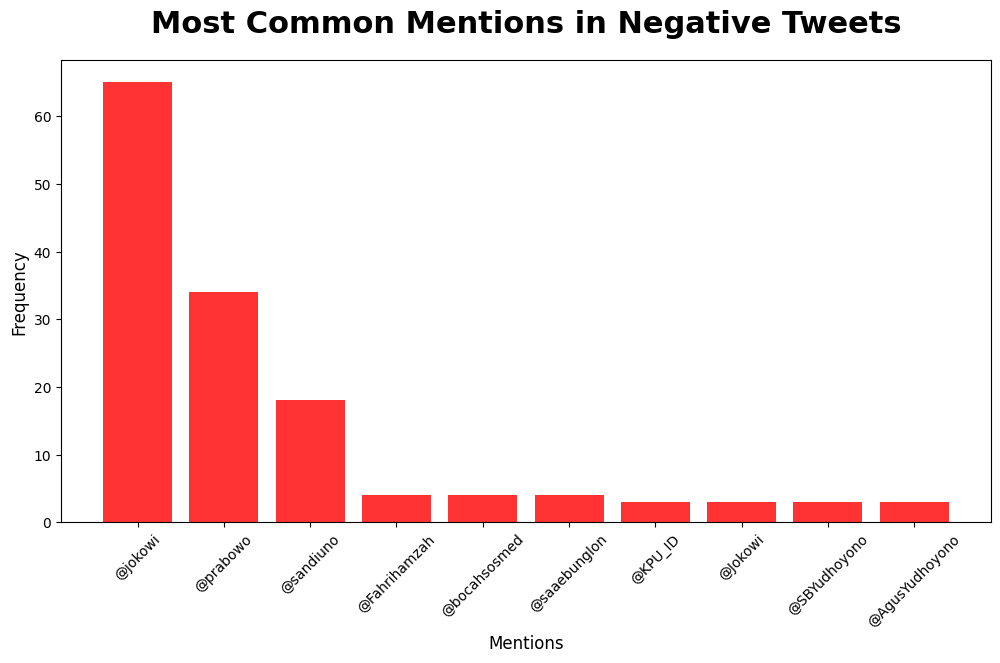

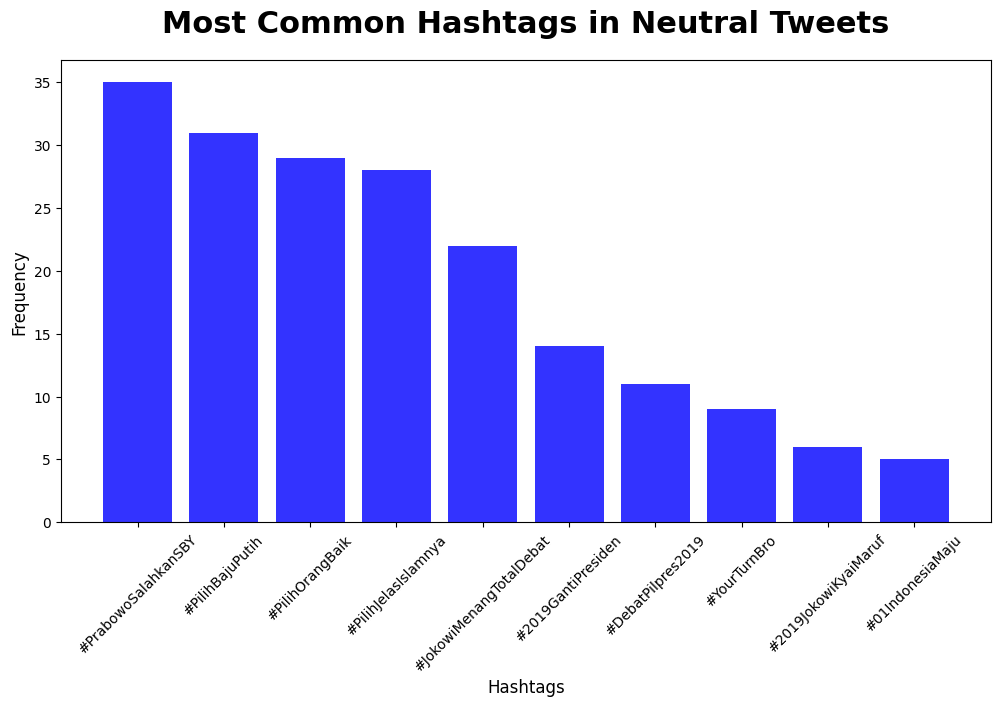

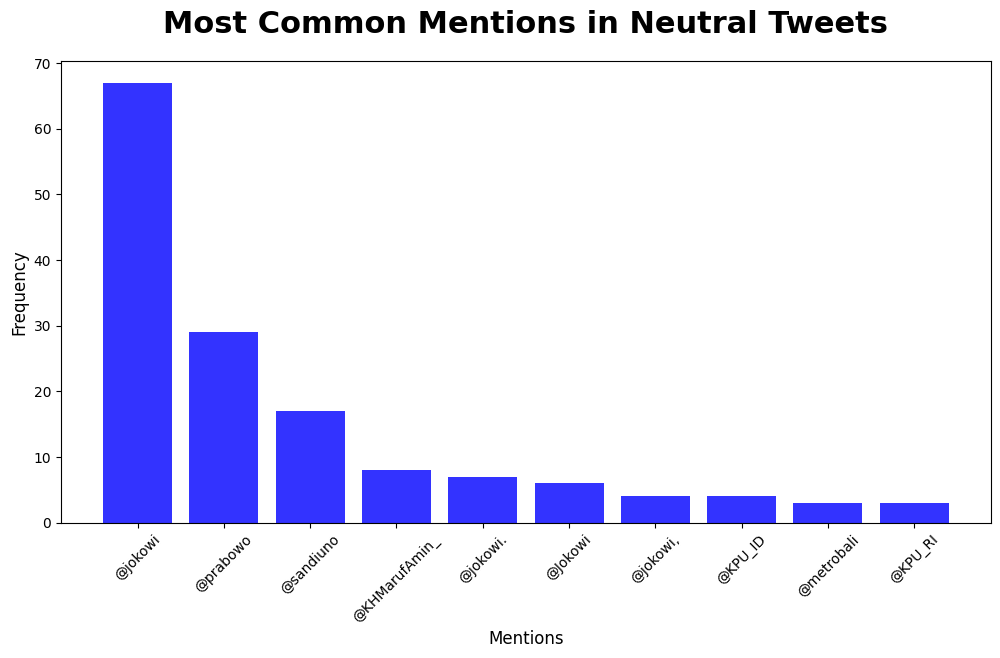

In [58]:
# Find and display most common hashtags and mentions for each sentiment
for sentiment in ['positif', 'negatif', 'netral']:
    subset = df_tweet[df_tweet['sentimen'] == sentiment]['tweet']
    common_hashtags_df = most_common_hashtags_or_mentions(subset, '#')
    common_mentions_df = most_common_hashtags_or_mentions(subset, '@')

    # Create a bar plot for hashtags
    plt.figure(figsize=(12,6))
    plt.bar(common_hashtags_df['#'], common_hashtags_df['Frequency'], alpha=0.8, color=color_dict[sentiment])
    plt.title(f'Most Common Hashtags in {name_dict[sentiment]} Tweets', fontdict=font, pad=20)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel('Hashtags', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

    # Create a bar plot for mentions
    plt.figure(figsize=(12,6))
    plt.bar(common_mentions_df['@'], common_mentions_df['Frequency'], alpha=0.8, color=color_dict[sentiment])
    plt.title(f'Most Common Mentions in {name_dict[sentiment]} Tweets', fontdict=font, pad=20)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel('Mentions', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()